# Google Play Store Apps Analysis

In [12]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] =14 
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [13]:
# suppressing the chained operations warning

pd.options.mode.chained_assignment = None

In [14]:
# reading the dataa

gplay = pd.read_csv(r'C:\Users\Hp\Playstore Analysis Project\googleplaystore.csv')
gplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [15]:
gplay.shape


(10841, 13)

In [16]:
# checking the data types of all the columns 

gplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [17]:
def printinfo():
    temp = pd.DataFrame(index = gplay.columns)
    temp['data_type'] = gplay.dtypes
    temp['null_count'] = gplay.isnull().sum()
    temp['unique_count'] = gplay.nunique()
    return temp

In [18]:
# Lets call the function

printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,float64,0,460
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


## Exploratory Data Analysis

### 1. gplay.Size column

In [19]:
gplay.Size

0        19000.000000
1        14000.000000
2         8700.000000
3        25000.000000
4         2800.000000
             ...     
10836    53000.000000
10837     3600.000000
10838     9500.000000
10839    21516.529524
10840    19000.000000
Name: Size, Length: 10841, dtype: float64

In [93]:
# scaling the size column from kb to mb

gplay.Size = (gplay.Size/1024).round(1)

### 2. gplay.Installs column

In [21]:
gplay.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object

In [22]:
# fixing the gplay.Installs columns

gplay.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [23]:
insta = gplay.Installs.str.strip('+').str.replace(',','')
installs = pd.to_numeric(insta, errors='coerce')        # errors ='coerce' will replace the incorrect value with NaN
gplay.Installs = installs

In [24]:
gplay.Installs.isna().value_counts()     

False    10840
True         1
Name: Installs, dtype: int64

Now **gplay.Installs** is in correct format but there is one **NaN** value. We can drop the corresponding row because droping a single null value won't affect our analysis. 

In [25]:
gplay.shape    # shape of the dataframe before dropping a null value

(10841, 13)

In [26]:
gplay = gplay[~gplay.Installs.isna()]

In [27]:
gplay.shape     # shape of the dataframe after droping

(10840, 13)

### 3. gplay.Rating column

In [28]:
gplay.Rating.isna().value_counts()

False    9366
True     1474
Name: Rating, dtype: int64

There are **1474 cells** in **gplay.Rating** column which are null.

In [29]:
gplay.Rating.value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

Now, we can fix the Rating column which contains a total of 1474 of missing values. Replacing the missing values with the Median value of that entire column.

In [30]:
## the below code raises SettingCopyWarning

# gplay.Rating.fillna(median, inplace=True)

In [31]:
median = gplay.Rating.median()

# the below code won't raise any error
gplay.Rating[:].fillna(value=median, inplace=True)

In [32]:
gplay.Rating.isna().sum()

0

### 4. gplay.Reviews column

In [33]:
gplay.Reviews = gplay.loc[:,'Reviews'].astype('int')

### 5. gplay.Price column

In [34]:
gplay.Price.value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [35]:
gplay.Price = gplay.Price.apply(lambda x: 0 if x == '0' else float(x[1:]))

### 6. gplay.Type column

In [36]:
gplay[gplay['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,21.0,0.0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [37]:
gplay['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

Replacing the mising value from our type column with 'free' as it has ocurred the most number of times.

In [38]:
gplay.Type.fillna('Free', inplace = True)

In [39]:
gplay.Type.value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

Finally, after fixing all the missing values, we should have a look at our data frame, We defined a function as printinfo() . So, it’s time to use that function.


In [40]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,float64,0,190
Installs,float64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


We have some of the unwanted columns which will be of not much use in the analysis process. So let's drop those columns.

In [41]:
gplay.drop(['Current Ver','Last Updated', 'Android Ver'], axis = 1, inplace = True)

In [42]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,float64,0,190
Installs,float64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


All the columns have the null_count as zero, which indicates that now the data frame doesn’t contain any missing values.
Now we are done with the data cleansing part and in a state to start the work for data preparation

# Sanity Checks

Used to check for errors within a dataset

In [43]:
# sanity checks on the Rating Column:
gplay[gplay.Rating<1] | gplay[gplay.Rating >5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


In [44]:
# sanity checks on the Reviews column

(gplay.Reviews > gplay.Installs).value_counts()

False    10829
True        11
dtype: int64

There are **11** such records where number of reviews are greater than the number of installs which is ambiguous.So we will drop these apps from our analysis.

In [45]:
gplay[gplay.Reviews > gplay.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,24.4,1.0,Free,0.00,Everyone,Medical
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.3,4,62.5,1.0,Free,0.00,Everyone,Education
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21.0,10000.0,Paid,2.49,Everyone,Lifestyle
5812,AX Watch for WatchMaker,PERSONALIZATION,4.3,2,0.2,1.0,Paid,0.99,Everyone,Personalization
5917,Ra Ga Ba,GAME,5.0,2,19.5,1.0,Paid,1.49,Everyone,Arcade
6508,Sam.BN Pro,TOOLS,4.3,11,2.0,10.0,Paid,0.99,Everyone,Tools
6700,Brick Breaker BR,GAME,5.0,7,18.6,5.0,Free,0.00,Everyone,Arcade
7402,Trovami se ci riesci,GAME,5.0,11,6.0,10.0,Free,0.00,Everyone,Arcade
8591,DN Blog,SOCIAL,5.0,20,4.1,10.0,Free,0.00,Teen,Social
9096,DZ Puzzle,FAMILY,4.3,14,45.9,10.0,Paid,0.99,Everyone,Puzzle


In [46]:
# droping the above rows from our gplay

rowindex = gplay[gplay.Reviews > gplay.Installs].index
gplay.drop(rowindex, inplace = True)     # droping the ambiguous rows
gplay.shape

(10829, 10)

In [47]:
# sanity checks on prices of free apps

gplay.Type.value_counts()

Free    10035
Paid      794
Name: Type, dtype: int64

In [48]:
gplay.Price.value_counts()

0.00     10035
0.99       144
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: Price, Length: 92, dtype: int64

In [49]:
((gplay.Type == 'Free') & (gplay.Price > 0)).value_counts()

False    10829
dtype: int64

Our Price column has no ambiguous data. 

In [50]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9648
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6000
Size,float64,0,190
Installs,float64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


# Duplicate Apps Checking :


In [51]:
# checking duplicate rows based on all column value
gplay[gplay.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,21.0,5000000.0,Free,0.0,Everyone,Business
236,Box,BUSINESS,4.2,159872,21.0,10000000.0,Free,0.0,Everyone,Business
239,Google My Business,BUSINESS,4.4,70991,21.0,5000000.0,Free,0.0,Everyone,Business
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,36.1,10000000.0,Free,0.0,Everyone,Business
261,join.me - Simple Meetings,BUSINESS,4.0,6989,21.0,1000000.0,Free,0.0,Everyone,Business
...,...,...,...,...,...,...,...,...,...,...
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,21.0,1000000.0,Free,0.0,Everyone,Productivity
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,21.0,100000000.0,Free,0.0,Everyone,Productivity
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,84.0,10000.0,Free,0.0,Everyone,Medical
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.0,10000000.0,Free,0.0,Everyone,Tools


We can `drop the above duplicate rows` from our dataframe.

In [52]:
gplay.drop_duplicates(inplace  = True)

In [53]:
gplay.shape

(10344, 10)

## Now we can check for duplicate apps present in our dataframe :

In [54]:
# checking the duplicates apps based on App column only

gplay.duplicated('App').value_counts()

False    9648
True      696
dtype: int64

There are **696** such apps which have same name on playstore.

In [55]:
# getting the dataframe of duplicates apps name

gplay[gplay.duplicated('App')].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
5415,365Scores - Live Scores,SPORTS,4.6,666246,24.4,10000000.0,Free,0.0,Everyone,Sports
1970,8 Ball Pool,GAME,4.5,14201604,50.8,100000000.0,Free,0.0,Everyone,Sports
1703,8 Ball Pool,GAME,4.5,14198602,50.8,100000000.0,Free,0.0,Everyone,Sports
1844,8 Ball Pool,GAME,4.5,14200550,50.8,100000000.0,Free,0.0,Everyone,Sports
1871,8 Ball Pool,GAME,4.5,14201891,50.8,100000000.0,Free,0.0,Everyone,Sports
...,...,...,...,...,...,...,...,...,...,...
1757,slither.io,GAME,4.4,5234810,21.0,100000000.0,Free,0.0,Everyone,Action
565,stranger chat - anonymous chat,DATING,3.5,13204,6.0,1000000.0,Free,0.0,Mature 17+,Dating
2637,textPlus: Free Text & Calls,SOCIAL,4.1,382121,27.3,10000000.0,Free,0.0,Everyone,Social
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,33.2,10000000.0,Free,0.0,Everyone 10+,Sports


In [56]:
# We can drop the above rows from our dataframe

gplay.drop_duplicates('App', inplace = True)
gplay.shape

(9648, 10)

# Exploratory Analysis and Visualization

In [57]:
# Create a box plot for the price column

gplay.describe()

,Rating,Reviews,Size,Installs,Price
count,9648.000000,9.648000e+03,9648.000000,9.648000e+03,9648.000000
mean,4.191833,2.168384e+05,20.053597,7.786373e+06,1.099729
std,0.496228,1.832349e+06,19.922682,5.378828e+07,16.861732
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.200000,1.000000e+03,0.000000
50%,4.300000,9.695000e+02,15.600000,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,24.400000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,97.700000,1.000000e+09,400.000000


In [58]:
# Checking the apps with price more than 200

(gplay.Price>200).value_counts()

False    9631
True       17
Name: Price, dtype: int64

In [59]:
gplay[(gplay.Price>200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4197,most expensive app (H),FAMILY,4.3,6,1.5,100.0,Paid,399.99,Everyone,Entertainment
4362,💎 I'm rich,LIFESTYLE,3.8,718,25.4,10000.0,Paid,399.99,Everyone,Lifestyle
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.1,10000.0,Paid,400.00,Everyone,Lifestyle
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000.0,Paid,399.99,Everyone,Lifestyle
5354,I am Rich Plus,FAMILY,4.0,856,8.5,10000.0,Paid,399.99,Everyone,Entertainment
5355,I am rich VIP,LIFESTYLE,3.8,411,2.5,10000.0,Paid,299.99,Everyone,Lifestyle
5356,I Am Rich Premium,FINANCE,4.1,1867,4.6,50000.0,Paid,399.99,Everyone,Finance
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.8,1000.0,Paid,379.99,Everyone,Lifestyle
5358,I am Rich!,FINANCE,3.8,93,21.5,1000.0,Paid,399.99,Everyone,Finance
5359,I am rich(premium),FINANCE,3.5,472,0.9,5000.0,Paid,399.99,Everyone,Finance


In [60]:
gplay[(gplay.Price>200) & (gplay.Installs<=10000) & (gplay.Reviews<=500)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4197,most expensive app (H),FAMILY,4.3,6,1.5,100.0,Paid,399.99,Everyone,Entertainment
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.1,10000.0,Paid,400.00,Everyone,Lifestyle
5355,I am rich VIP,LIFESTYLE,3.8,411,2.5,10000.0,Paid,299.99,Everyone,Lifestyle
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.8,1000.0,Paid,379.99,Everyone,Lifestyle
5358,I am Rich!,FINANCE,3.8,93,21.5,1000.0,Paid,399.99,Everyone,Finance
5359,I am rich(premium),FINANCE,3.5,472,0.9,5000.0,Paid,399.99,Everyone,Finance
5362,I Am Rich Pro,FAMILY,4.4,201,2.6,5000.0,Paid,399.99,Everyone,Entertainment
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.6,1000.0,Paid,399.99,Teen,Finance
5366,I Am Rich,FAMILY,3.6,217,4.8,10000.0,Paid,389.99,Everyone,Entertainment
5369,I am Rich,FINANCE,4.3,180,3.7,5000.0,Paid,399.99,Everyone,Finance


In [61]:
# cleaning the Price column considering other variables

gplay = gplay[~((gplay.Price>200) & (gplay.Installs<=10000) & (gplay.Reviews<=500))]

## BOXPLOT :

In [62]:
import matplotlib.pyplot as plt

count    9635.000000
mean        0.575538
std         8.933478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       399.990000
Name: Price, dtype: float64




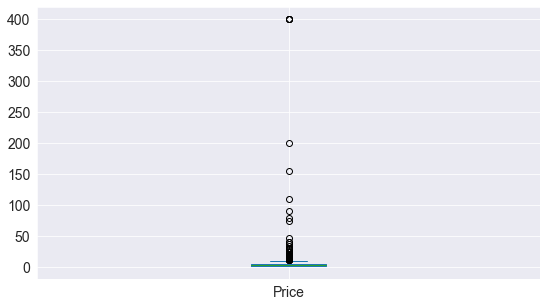

In [63]:
# creating a boxplot for paid apps

print(gplay.Price.describe(), end = '\n\n\n')
gplay[gplay.Price>0].Price.plot.box()
plt.show()

In [64]:
# Check the apps with price more than 200

gplay[gplay.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4362,💎 I'm rich,LIFESTYLE,3.8,718,25.4,10000.0,Paid,399.99,Everyone,Lifestyle
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000.0,Paid,399.99,Everyone,Lifestyle
5354,I am Rich Plus,FAMILY,4.0,856,8.5,10000.0,Paid,399.99,Everyone,Entertainment
5356,I Am Rich Premium,FINANCE,4.1,1867,4.6,50000.0,Paid,399.99,Everyone,Finance


In [65]:
# cleaning the Price Column again

gplay = gplay[gplay.Price<=200]
gplay.shape

(9631, 10)

## Histograms:

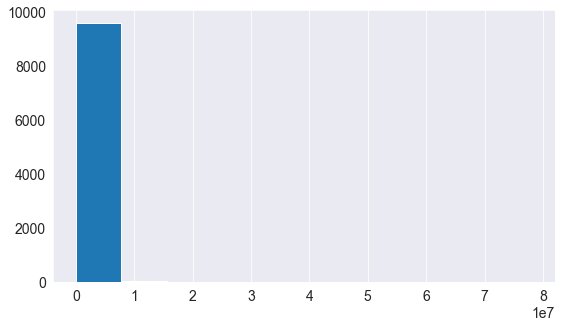

In [66]:
# Creating a histogram of the Reviews

plt.hist(gplay.Reviews)
plt.grid(axis='y')
plt.show()

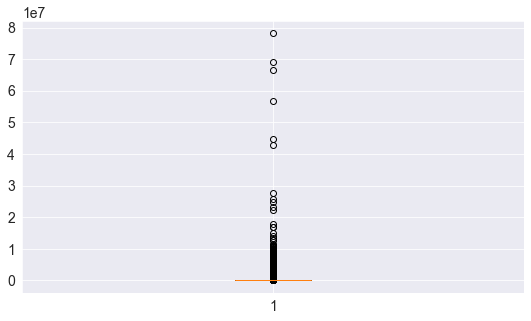

In [67]:
plt.boxplot(gplay.Reviews)
plt.show()


# Categories with the most number of Apps


In [68]:
gplay.Category.value_counts()

FAMILY                 1826
GAME                    955
TOOLS                   826
BUSINESS                420
MEDICAL                 394
PERSONALIZATION         375
PRODUCTIVITY            374
LIFESTYLE               362
FINANCE                 338
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  238
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [69]:
yValues = gplay['Category'].value_counts().index
xValues = gplay['Category'].value_counts().values

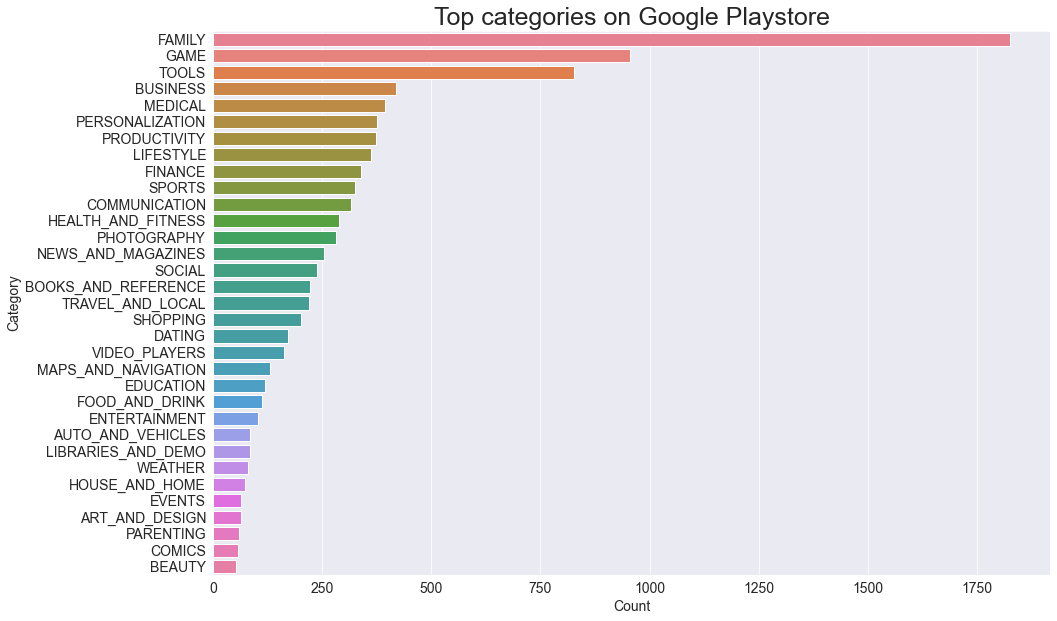

In [70]:
plt.figure(figsize=(15,10))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x=xValues,y=yValues, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25)
plt.show()

**Family** category has the most number of installs on google play store followed by **Game** & **Tools** category.

# **Content** category with the most apps


In [71]:
gplay['Content Rating'].value_counts()

Everyone           7877
Teen               1034
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [72]:
x2 = gplay['Content Rating'].value_counts().index
y2 = gplay['Content Rating'].value_counts().values

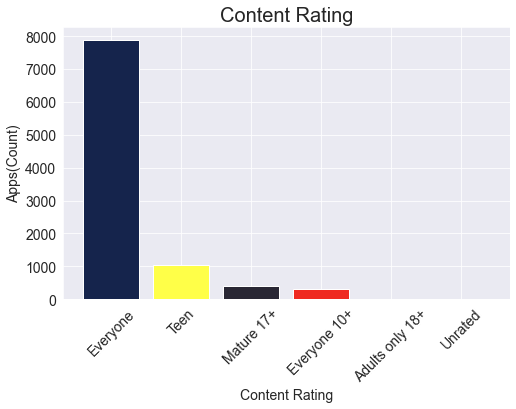

In [73]:
plt.figure(figsize=(8,5))
plt.bar(x2,y2,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'])
plt.title('Content Rating',size = 20)
plt.ylabel('Apps(Count)')
plt.xlabel('Content Rating')
plt.xticks(rotation=45)
plt.show()

From the above plots we can clearly see that **Everyone** category has the most number of apps on play store.


# Playstore Apps rating distribution

In [74]:
gplay.Rating.describe()

count    9631.000000
mean        4.192316
std         0.496284
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

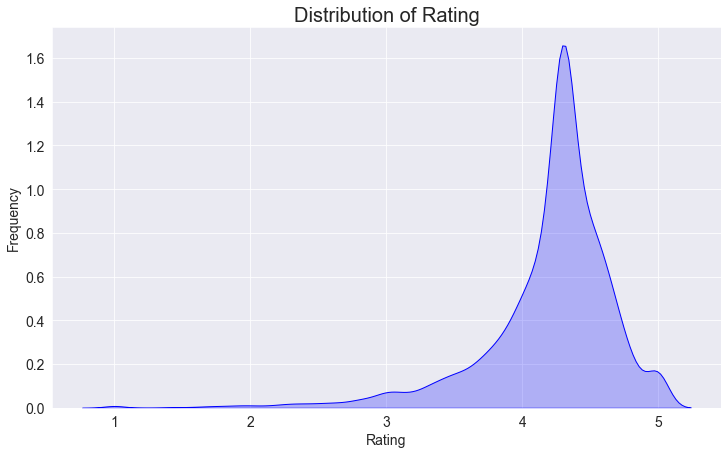

In [75]:
plt.figure(figsize=(12,7))
plt.xlabel('Rating')
plt.ylabel('Frequency')
sns.kdeplot(gplay.Rating, color='Blue', shade=True)
plt.title('Distribution of Rating', size=20)
plt.show()

From the above graph we come to conclusion that most of the apps in google playstore are rated in between **3.5** to **4.8**.

# Pie Chart of percentage of Paid and Free apps

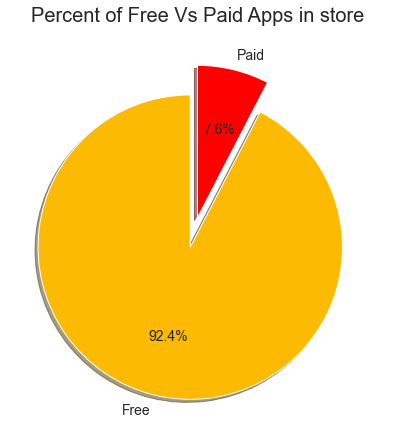

In [76]:
plt.figure(figsize=(7,7))
labels = gplay.Type.value_counts(sort=True).index
sizes = gplay.Type.value_counts(sort=True)
colors = ['#fcba03','red']
explode = (0.2,0)
plt.pie(sizes, explode, labels, colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percent of Free Vs Paid Apps in store', size = 20)
plt.show()

From the above graph we can see that `92%(Approx.)` of apps in google play store are free and `8%(Approx.)` are paid.

# App categories with the most installs

In [77]:
# series groupby objects
gplay.groupby('Category').Installs.sum().sort_values()    

Category
EVENTS                 1.597316e+07
BEAUTY                 2.719705e+07
PARENTING              3.152111e+07
MEDICAL                3.819318e+07
COMICS                 4.498115e+07
LIBRARIES_AND_DEMO     5.299591e+07
AUTO_AND_VEHICLES      5.313021e+07
HOUSE_AND_HOME         9.721246e+07
ART_AND_DESIGN         1.143381e+08
DATING                 1.409261e+08
FOOD_AND_DRINK         2.117988e+08
EDUCATION              3.529520e+08
WEATHER                3.611005e+08
FINANCE                4.552857e+08
MAPS_AND_NAVIGATION    5.032819e+08
LIFESTYLE              5.036825e+08
BUSINESS               6.971649e+08
SPORTS                 1.096474e+09
HEALTH_AND_FITNESS     1.144023e+09
SHOPPING               1.400349e+09
PERSONALIZATION        1.532495e+09
BOOKS_AND_REFERENCE    1.665970e+09
ENTERTAINMENT          2.113660e+09
NEWS_AND_MAGAZINES     2.369218e+09
TRAVEL_AND_LOCAL       2.894887e+09
VIDEO_PLAYERS          3.926903e+09
FAMILY                 4.427916e+09
PHOTOGRAPHY        

In [78]:
# dataframe groupby objects
highest_installs = gplay.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

In [79]:
highest_installs.head()

,Installs
Category,
GAME,1.387892e+10
COMMUNICATION,1.103828e+10
TOOLS,8.001772e+09
PRODUCTIVITY,5.793091e+09
SOCIAL,5.487868e+09


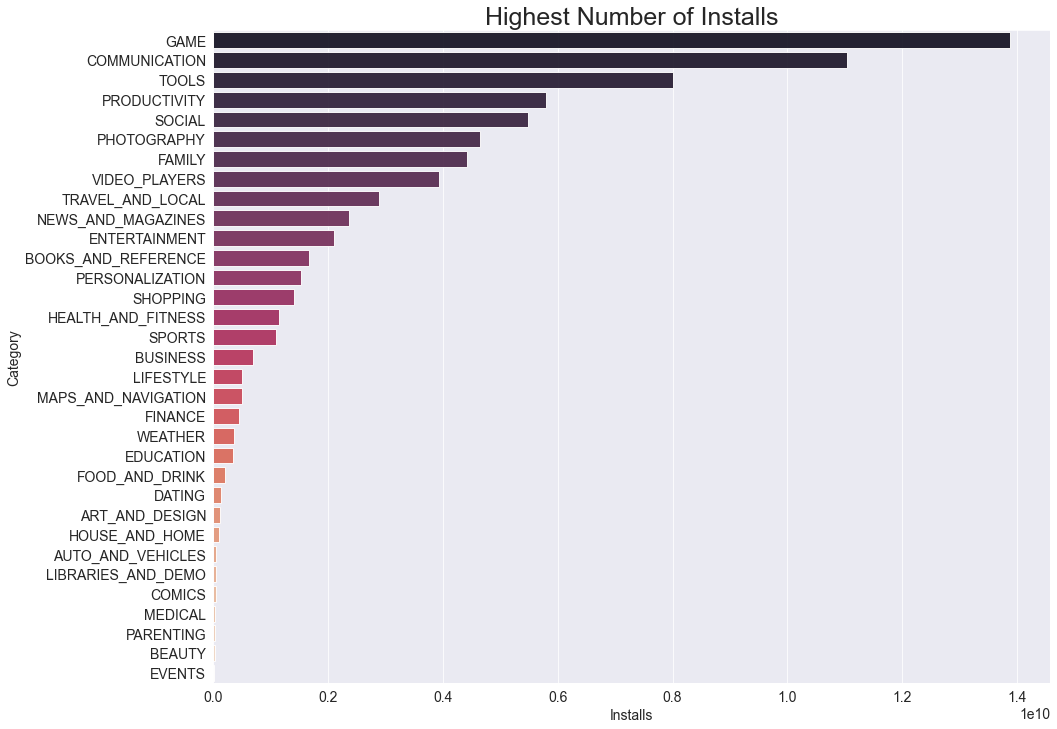

In [80]:
x3 = highest_installs.values
x3 = x3.reshape(-1)
y3 = highest_installs.index

plt.figure(figsize=(15,12))
plt.xlabel('Installs')
plt.ylabel('Category')

graph = sns.barplot(x=x3,y=y3, alpha=0.9, palette = 'rocket')
graph.set_title('Highest Number of Installs', fontsize=25)

plt.show()

From the above graph, it can be interpreted that the top categories with highest installs are `Productivity`,`News_And_Magazines`,`Game`,`Family` and `Tools`.

# Top 10 installed apps in each category

In [94]:
gplay[gplay.Category == 'FAMILY'].sort_values(by='Installs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4111,Talking Tom Cat 2,FAMILY,4.3,3213548,0.1,100000000.0,Free,0.0,Everyone 10+,Entertainment
4329,Tom Loves Angela,FAMILY,4.1,1111915,0.0,100000000.0,Free,0.0,Everyone,Entertainment
4247,Talking Tom Cat,FAMILY,4.3,1838090,0.0,100000000.0,Free,0.0,Everyone 10+,Casual
6849,Bubble Witch 2 Saga,FAMILY,4.3,2838064,0.0,100000000.0,Free,0.0,Everyone,Casual
4229,Where's My Water? Free,FAMILY,4.4,1372013,0.1,100000000.0,Free,0.0,Everyone,Puzzle;Brain Games
4797,Talking Tom & Ben News,FAMILY,4.4,1131937,0.0,100000000.0,Free,0.0,Everyone,Entertainment
4217,Talking Ginger,FAMILY,4.2,1752017,0.0,100000000.0,Free,0.0,Everyone,Entertainment
3975,Hay Day,FAMILY,4.5,10053186,0.1,100000000.0,Free,0.0,Everyone,Casual
6269,Bitmoji – Your Personal Emoji,FAMILY,4.6,2312084,0.0,100000000.0,Free,0.0,Teen,Entertainment
4126,Dumb Ways to Die 2: The Games,FAMILY,4.2,1671658,0.0,50000000.0,Free,0.0,Teen,Casual


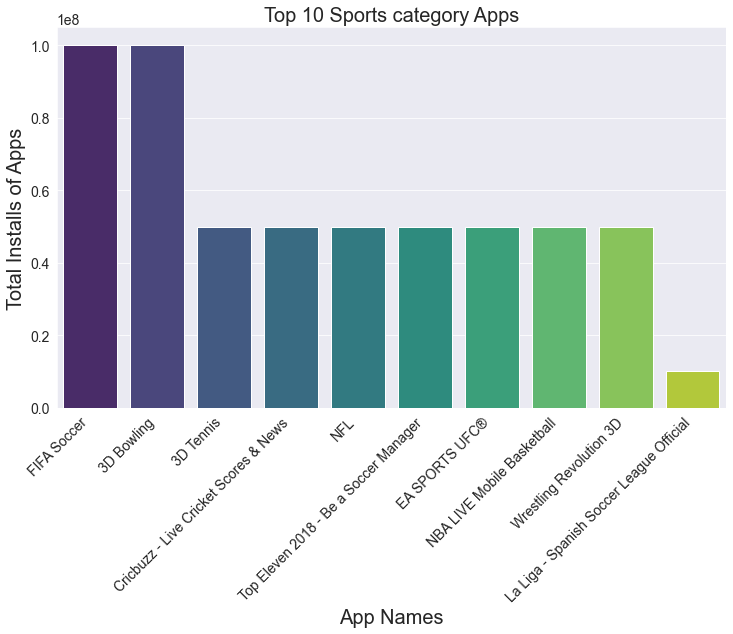

In [82]:
# Creating a function to write the above code for every category for which I want to know the top 10 apps

def top10installed(cat):
    global plt
    top10 = gplay[gplay.Category == cat.upper()].sort_values(by="Installs", ascending = False).head(10)
    
    plt.figure(figsize=(12,7))
    graph=sns.barplot(x=top10.App, y = top10.Installs, palette = 'viridis')
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')
    graph.set_xlabel("App Names", size = 20)
    graph.set_ylabel('Total Installs of Apps', size = 20)
    graph.set_title(f"Top 10 {cat} category Apps", size = 20)
    
    plt.show()

top10installed('Sports')

# Top 10 expensive paid apps in playstore

In [83]:
top10expensive=gplay[['App','Price']].sort_values(by = "Price",ascending=False).head(10)
top10expensive

,App,Price
9719,EP Cook Book,200.00
6692,cronometra-br,154.99
6624,BP Fitness Lead Scanner,109.99
9730,Lean EQ,89.99
2253,Vargo Anesthesia Mega App,79.99
2390,Language Therapy: Aphasia,74.99
6559,Dr.Dice - Sic bo analyzer,46.99
4134,Norwegian For Kids & Babies F,39.99
2414,LTC AS Legal,39.99
5360,I am Rich Person,37.99


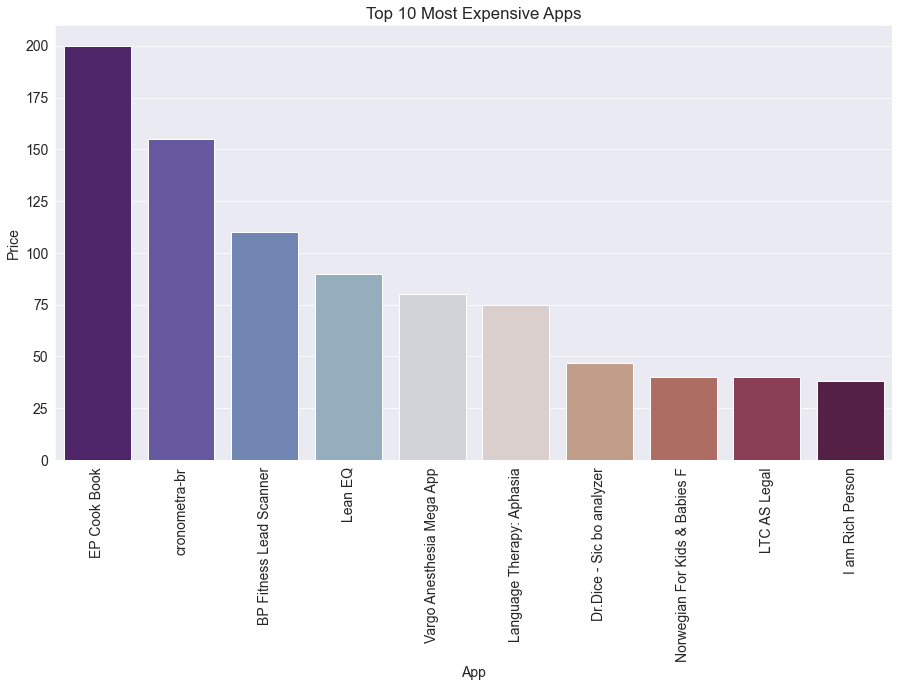

In [84]:
labels = top10expensive.App
prices = top10expensive.Price

plt.figure(figsize=(15,8))
ax=sns.barplot(x = labels, y = prices, palette='twilight_shifted')
ax.set_title('Top 10 Most Expensive Apps')
plt.xticks(rotation = 90)
plt.show()

Above are the top 10 most expensive apps on playstore. `LTC AS Legal` is the most expensive app on playstore.

# Apps with the most reviews

In [85]:
highestRev = gplay.sort_values(by='Reviews', ascending=False).head(10)
highestRev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2544,Facebook,SOCIAL,4.1,78158306,21.0,1.000000e+09,Free,0.0,Teen,Social
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21.0,1.000000e+09,Free,0.0,Everyone,Communication
2545,Instagram,SOCIAL,4.5,66577313,21.0,1.000000e+09,Free,0.0,Teen,Social
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21.0,1.000000e+09,Free,0.0,Everyone,Communication
1670,Clash of Clans,GAME,4.6,44891723,95.7,1.000000e+08,Free,0.0,Everyone 10+,Strategy
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,21.0,5.000000e+08,Free,0.0,Everyone,Tools
1654,Subway Surfers,GAME,4.5,27722264,74.2,1.000000e+09,Free,0.0,Everyone 10+,Arcade
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,21.0,1.000000e+09,Free,0.0,Teen,Video Players & Editors
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21.0,5.000000e+08,Free,0.0,Everyone,Tools
1660,Clash Royale,GAME,4.6,23133508,94.7,1.000000e+08,Free,0.0,Everyone 10+,Strategy


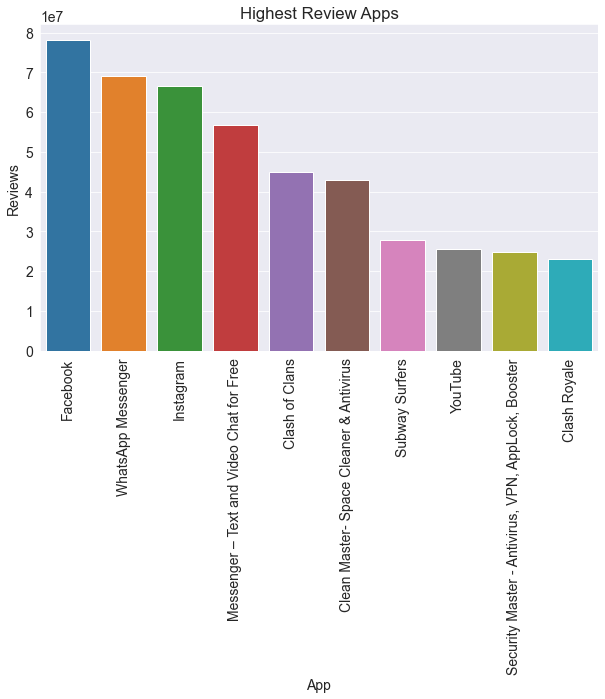

In [86]:
# plotting the bar chart for the above graph

plt.figure(figsize=(10,6))
ax = sns.barplot(x = highestRev.App,y = highestRev.Reviews)
ax.set_title("Highest Review Apps")
plt.xticks(rotation=90)
plt.show()

`Facebook` is the app with maximum number of reviews on playstore.

# Count of apps in each genre

In [87]:
# Using the value_counts function on gplay.Genres column to get the count of apps in every genre

gplay.Genres.value_counts()

Tools                              825
Entertainment                      557
Education                          509
Business                           420
Medical                            394
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: Genres, Length: 118, dtype: int64

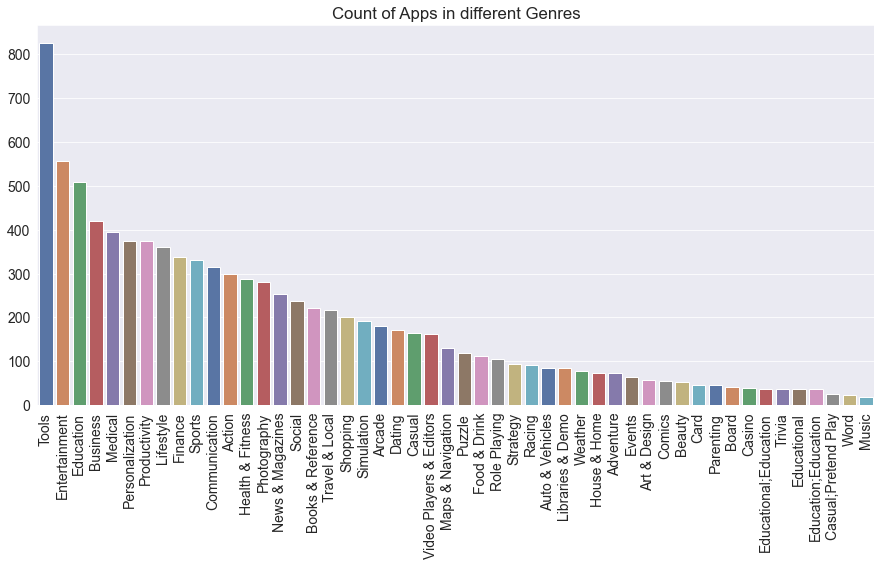

In [88]:
genreCount = gplay.Genres.value_counts(ascending=False).head(50)    # selecting top 50 apps with maximum count
x = genreCount.index
y = genreCount.values

plt.figure(figsize=(15,7))
ax=sns.barplot(x = x,y=y, palette = 'deep')
ax.set_title('Count of Apps in different Genres')
plt.xticks(rotation=90)
plt.show()

From the above visualization we can see that **Tools** has the maximum number Apps followed by **Entertainment, Education, Business and Medical**.

# Highest earning apps

In [89]:
earning = gplay[['App','Installs','Price']]
earning['Earning'] = gplay.Installs * gplay.Price
earning

,App,Installs,Price,Earning
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000.0,0.0,0.0
1,Coloring book moana,500000.0,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000.0,0.0,0.0
3,Sketch - Draw & Paint,50000000.0,0.0,0.0
4,Pixel Draw - Number Art Coloring Book,100000.0,0.0,0.0
...,...,...,...,...
10836,Sya9a Maroc - FR,5000.0,0.0,0.0
10837,Fr. Mike Schmitz Audio Teachings,100.0,0.0,0.0
10838,Parkinson Exercices FR,1000.0,0.0,0.0
10839,The SCP Foundation DB fr nn5n,1000.0,0.0,0.0


In [90]:
earning['Earning']=earning.Earning.astype('i')

In [91]:
highestEarning = earning.sort_values(by='Earning',ascending=False).head(10)
highestEarning

,App,Installs,Price,Earning
2241,Minecraft,10000000.0,6.99,69900000
4034,Hitman Sniper,10000000.0,0.99,9900000
7417,Grand Theft Auto: San Andreas,1000000.0,6.99,6990000
2883,Facetune - For Free,1000000.0,5.99,5990000
5578,Sleep as Android Unlock,1000000.0,5.99,5990000
8804,DraStic DS Emulator,1000000.0,4.99,4990000
4133,Weather Live,500000.0,5.99,2995000
5631,Five Nights at Freddy's,1000000.0,2.99,2990000
9941,Tasker,1000000.0,2.99,2990000
2242,Card Wars - Adventure Time,1000000.0,2.99,2990000


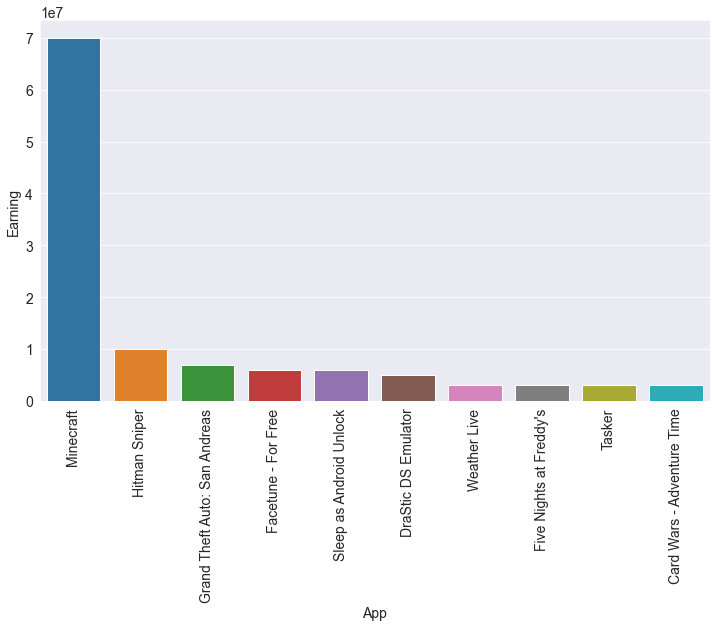

In [92]:
labels=highestEarning.App
values=highestEarning.Earning

plt.figure(figsize=(12,7))           
sns.barplot(x=labels, y=values)
plt.xticks(rotation=90)
plt.show()

The top five apps with highest earnings found on google playstore are:-
1. Minecraft
2. Hitman Sniper
3. Grand Theft Auto: San Andreas
4. Facetune-For Free
5. Sleep as Android Unlock